In [10]:
# Install required packages (run this cell first)
# Uncomment if you need to install:
# !pip install pymysql sqlalchemy pandas python-dotenv

In [11]:
from Utils import setup_database_connection
from Utils import load_all_players
import matplotlib.pyplot as plt

engine = setup_database_connection()
df_players = load_all_players(engine)

Connecting to database...
Connection successful!
Loaded 135095 players


In [12]:
print(f"\nColumns ({len(df_players.columns)}):")
for i, col in enumerate(df_players.columns, 1):
    print(f"  {i:2}. {col}")

print(f"\nFirst few rows:")
df_players.head()


Columns (37):
   1. steam_id
   2. accuracy_enemy_spotted
   3. accuracy_head
   4. counter_strafing_good_shots_ratio
   5. created_at
   6. ct_opening_aggression_success_rate
   7. ct_opening_duel_success_percentage
   8. flashbang_hit_foe_avg_duration
   9. flashbang_hit_foe_per_flashbang
  10. flashbang_hit_friend_per_flashbang
  11. flashbang_leading_to_kill
  12. flashbang_thrown
  13. has_ban
  14. he_foes_damage_avg
  15. he_friends_damage_avg
  16. name
  17. preaim
  18. rank_faceit_elo
  19. rank_premier
  20. rating_aim
  21. rating_clutch
  22. rating_ct_leetify
  23. rating_opening
  24. rating_positioning
  25. rating_t_leetify
  26. rating_utility
  27. reaction_time_ms
  28. spray_accuracy
  29. t_opening_aggression_success_rate
  30. t_opening_duel_success_percentage
  31. total_matches
  32. trade_kill_opportunities_per_round
  33. trade_kills_success_percentage
  34. traded_deaths_success_percentage
  35. updated_at
  36. utility_on_death_avg
  37. win_rate

First f

,steam_id,accuracy_enemy_spotted,accuracy_head,counter_strafing_good_shots_ratio,created_at,ct_opening_aggression_success_rate,ct_opening_duel_success_percentage,flashbang_hit_foe_avg_duration,flashbang_hit_foe_per_flashbang,flashbang_hit_friend_per_flashbang,...,spray_accuracy,t_opening_aggression_success_rate,t_opening_duel_success_percentage,total_matches,trade_kill_opportunities_per_round,trade_kills_success_percentage,traded_deaths_success_percentage,updated_at,utility_on_death_avg,win_rate
0,76561197960265861,32.2254,22.5629,73.3536,2025-11-02 21:31:39.509392,47.9923,53.6181,2.9302,0.7763,0.4125,...,35.1063,17.1551,20.2323,5307,0.3146,53.2647,50.8498,2025-11-02 21:31:39.509394,206.7068,0.4483
1,76561197960269484,36.6993,8.9129,88.6158,2025-11-02 06:35:56.634148,36.4189,52.4810,1.8236,0.5673,0.3882,...,42.1820,44.7046,55.6048,101,0.3016,49.0756,57.3473,2025-11-02 06:35:56.634149,61.4403,0.5172
2,76561197960270064,33.7918,28.2190,88.2303,2025-11-02 05:08:51.804119,60.5164,68.4052,2.8376,0.6661,0.5738,...,40.5664,60.7431,66.9089,391,0.3621,44.2493,48.8391,2025-11-02 05:08:51.804121,245.1163,0.6552
3,76561197960270226,30.4511,14.8110,67.9802,2025-10-28 06:25:57.122924,38.7257,50.1534,3.0497,0.6915,0.4603,...,31.8743,45.4512,51.3177,2208,0.3145,41.6189,50.3145,2025-10-28 06:25:57.122925,136.4081,0.7000
4,76561197960270284,33.9972,20.0649,74.1879,2025-10-27 22:02:13.957349,44.0150,54.1006,2.7499,0.6101,0.2908,...,38.4199,35.2839,41.4939,1173,0.3828,50.5808,51.3780,2025-10-27 22:02:13.957351,166.0525,0.4483


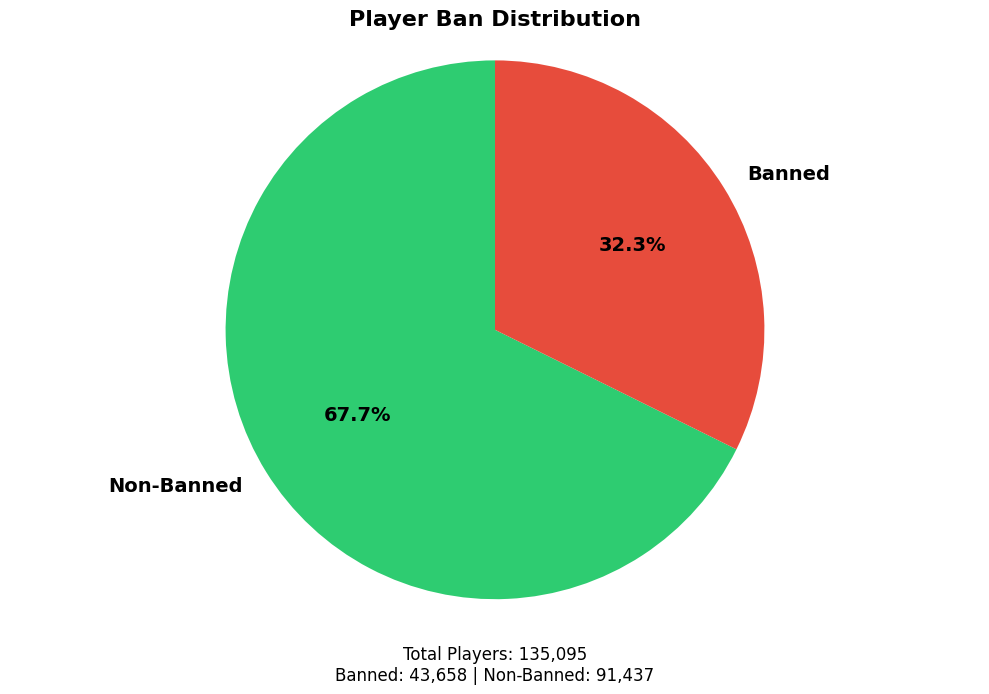

In [18]:
ban_counts = df_players['has_ban'].value_counts()
labels = ['Non-Banned', 'Banned']
sizes = [ban_counts.get(b'\x00', 0), ban_counts.get(b'\x01', 0)]
colors = ['#2ecc71', '#e74c3c']

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 14, 'weight': 'bold'})
plt.title('Player Ban Distribution', fontsize=16, weight='bold')

total = sum(sizes)
plt.text(0, -1.3, f'Total Players: {total:,}\nBanned: {sizes[1]:,} | Non-Banned: {sizes[0]:,}',
         ha='center', fontsize=12)

plt.axis('equal')
plt.tight_layout()
plt.show()